In [5]:
import numpy as np

# Generar datos de entrada de compradores y vendedores
def generate_data(num_buyers, num_sellers):
    # Generar precios y cantidades aleatorias para compradores
    buyers_data = []
    for i in range(num_buyers):
        price_limit = np.random.uniform(5, 10)  # Precio máximo entre 5 y 10
        quantity = np.random.randint(1, 20)      # Cantidad entre 1 y 20
        buyers_data.extend([price_limit, quantity])

    # Generar precios y cantidades aleatorias para vendedores
    sellers_data = []
    for i in range(num_sellers):
        price_min = np.random.uniform(3, 8)  # Precio mínimo entre 3 y 8
        quantity = np.random.randint(1, 20)   # Cantidad entre 1 y 20
        sellers_data.extend([price_min, quantity])

    return buyers_data, sellers_data

# Guardar datos en un archivo .txt
def save_to_txt(buyers_data, sellers_data, filename):
    with open(filename, 'w') as f:
        f.write("Buyers Data:\n")
        f.write("Price Limit, Quantity\n")
        for i in range(0, len(buyers_data), 2):
            f.write(f"{buyers_data[i]:.2f}, {buyers_data[i+1]}\n")

        f.write("\nSellers Data:\n")
        f.write("Price Min, Quantity\n")
        for i in range(0, len(sellers_data), 2):
            f.write(f"{sellers_data[i]:.2f}, {sellers_data[i+1]}\n")

# Parámetros
num_buyers = 10  # Número de compradores
num_sellers = 10  # Número de vendedores
filename = 'market_data.txt'  # Nombre del archivo

# Generar datos y guardarlos
buyers_data, sellers_data = generate_data(num_buyers, num_sellers)
save_to_txt(buyers_data, sellers_data, filename)


Precio: 3.29, Cantidad Vendida: 9.0
Precio: 3.78, Cantidad Vendida: 11.0
Precio: 3.89, Cantidad Vendida: 19.0
Precio: 4.8, Cantidad Vendida: 34.0
Precio: 5.11, Cantidad Vendida: 38.0
Precio: 5.28, Cantidad Vendida: 38.0
Precio: 5.39, Cantidad Vendida: 39.0
Precio: 5.49, Cantidad Vendida: 39.0
Precio: 6.02, Cantidad Vendida: 44.0
Precio: 6.07, Cantidad Vendida: 44.0
Precio: 6.97, Cantidad Vendida: 45.0
Precio: 7.19, Cantidad Vendida: 48.0
Precio: 7.5, Cantidad Vendida: 61.0
Precio: 7.61, Cantidad Vendida: 46.0
Precio: 8.33, Cantidad Vendida: 41.0
Precio: 8.51, Cantidad Vendida: 35.0
Precio: 8.87, Cantidad Vendida: 27.0
Precio: 9.32, Cantidad Vendida: 24.0
Precio: 9.44, Cantidad Vendida: 19.0
Precio: 9.72, Cantidad Vendida: 0

La mayor cantidad vendida es al precio: 7.5 con 61.0 unidades. Hay un Superávit de energía en este tramo.
Cantidad: 1.0 unidades.


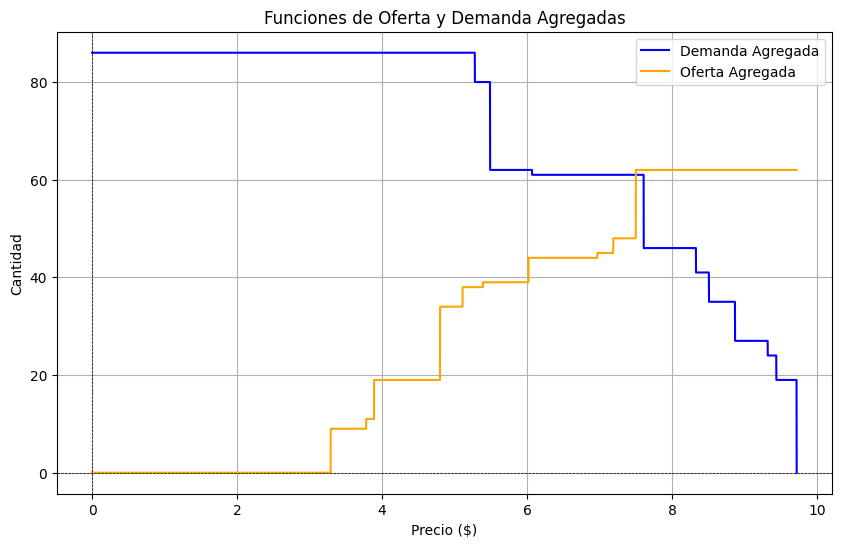

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar datos de compradores y vendedores desde un archivo .txt
def load_buyers_sellers(filename):
    buyers = []
    sellers = []
    reading_buyers = False
    reading_sellers = False

    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()  # Eliminar espacios en blanco

            if line == "Buyers Data:":
                reading_buyers = True
                reading_sellers = False
                continue  # Pasar a la siguiente línea
            elif line == "Sellers Data:":
                reading_buyers = False
                reading_sellers = True
                continue  # Pasar a la siguiente línea

            # Si estamos leyendo compradores y la línea tiene datos
            if reading_buyers and line and not line.startswith("Price Limit"):
                price_limit, quantity = map(float, line.split(','))
                buyers.append({'price_limit': price_limit, 'quantity': quantity})

            # Si estamos leyendo vendedores y la línea tiene datos
            if reading_sellers and line and not line.startswith("Price Min"):
                price_min, quantity = map(float, line.split(','))
                sellers.append({'price_min': price_min, 'quantity': quantity})

    return buyers, sellers


# Función de demanda agregada
def aggregated_demand(buyers, price):
    total_demand = sum(buyer['quantity'] for buyer in buyers if price < buyer['price_limit'])
    return total_demand

# Función de oferta agregada
def aggregated_supply(sellers, price):
    total_supply = sum(seller['quantity'] for seller in sellers if price >= seller['price_min'])
    return total_supply

# Función para generar tramos a partir de los límites de compradores y vendedores
def generate_price_segments(buyers, sellers):
    price_limits = [buyer['price_limit'] for buyer in buyers] + [seller['price_min'] for seller in sellers]
    price_segments = sorted(set(price_limits))
    return price_segments

# Cargar datos de compradores y vendedores desde un archivo .txt
filename = 'market_data.txt'  # Nombre del archivo
buyers, sellers = load_buyers_sellers(filename)

# Generar tramos a partir de los límites de los jugadores
price_segments = generate_price_segments(buyers, sellers)

# Preparar datos para los gráficos desde 0 hasta el valor máximo de precios
max_price = max(price_segments)
prices = np.linspace(0, max_price, 5000)
demand_values = [aggregated_demand(buyers, price) for price in prices]
supply_values = [aggregated_supply(sellers, price) for price in prices]

# Calcular cantidades vendidas en cada tramo
max_quantity = 0
best_tramo = None
deficit_superavit = ""
quantity_difference = 0

for price in price_segments:
    demand = aggregated_demand(buyers, price)
    supply = aggregated_supply(sellers, price)
    quantity_sold = min(demand, supply)

    print(f"Precio: {price}, Cantidad Vendida: {quantity_sold}")

    if quantity_sold > max_quantity or (quantity_sold == max_quantity and (best_tramo is None or price < best_tramo)):
        max_quantity = quantity_sold
        best_tramo = price
        # Determinar si hay déficit o superávit
        if demand > supply:
            deficit_superavit = "Déficit"
            quantity_difference = demand - supply  # Cantidad de déficit
        elif supply > demand:
            deficit_superavit = "Superávit"
            quantity_difference = supply - demand  # Cantidad de superávit
        else:
            deficit_superavit = "Equilibrio"
            quantity_difference = 0  # Sin déficit ni superávit

print(f"\nLa mayor cantidad vendida es al precio: {best_tramo} con {max_quantity} unidades. Hay un {deficit_superavit} de energía en este tramo.")
if deficit_superavit != "Equilibrio":
    print(f"Cantidad: {quantity_difference} unidades.")

# Graficar funciones de oferta y demanda
plt.figure(figsize=(10, 6))
plt.plot(prices, demand_values, label='Demanda Agregada', color='blue')
plt.plot(prices, supply_values, label='Oferta Agregada', color='orange')

# Añadir etiquetas y título
plt.title('Funciones de Oferta y Demanda Agregadas')
plt.xlabel('Precio ($)')
plt.ylabel('Cantidad')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()
